In [15]:
import shap
import qiime2
from sklearn.pipeline import Pipeline
import pandas as pd
import biom
%matplotlib inline

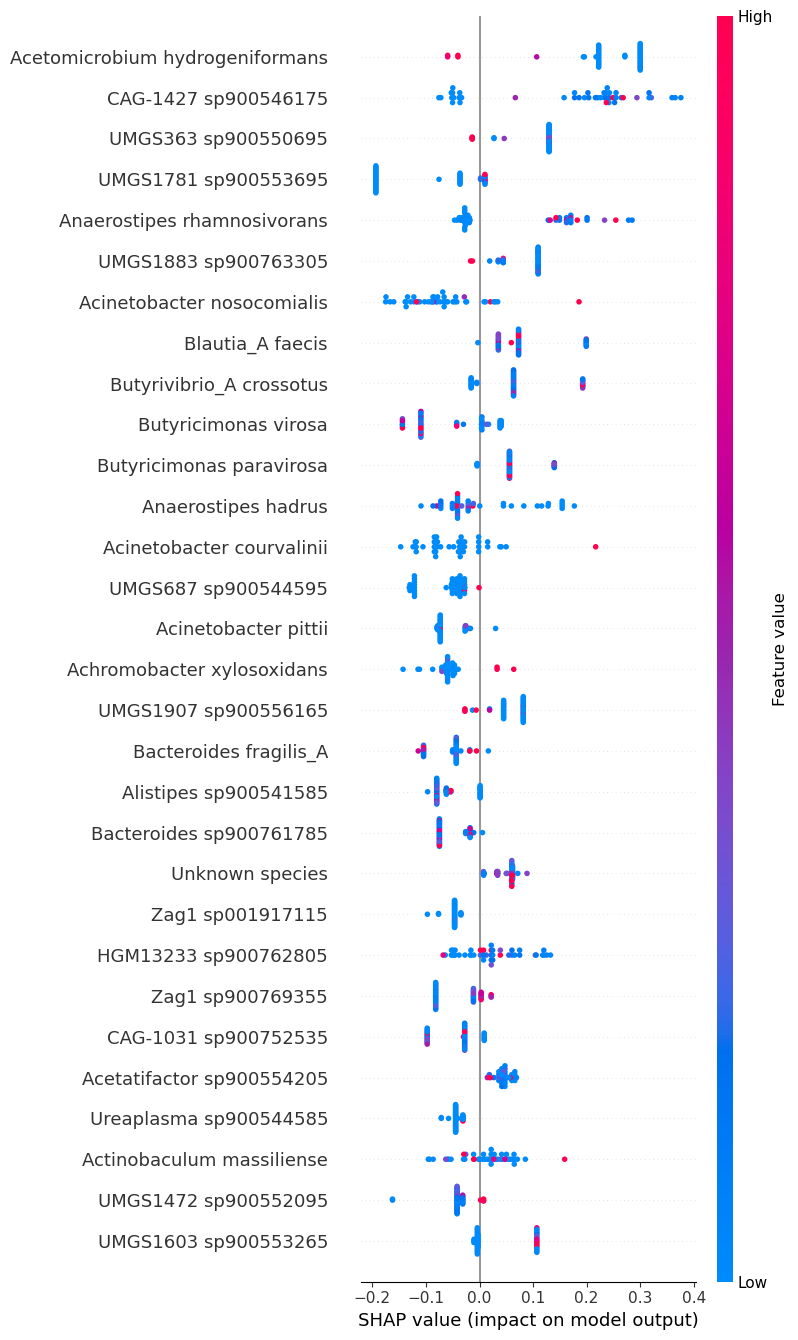

In [17]:
fname = '../snakemake/data/Qin2012T2D/classify/moving-pictures-classifier_GB_220/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../snakemake/data/Qin2012T2D/classify/moving-pictures-classifier_GB_220/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../snakemake/data/Qin2012T2D/Qin2012T2D_220samples.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../snakemake/data/Qin2012T2D/Qin2012T2D_metadata_new221.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../snakemake/data/Qin2012T2D/classify/moving-pictures-classifier_GB_220/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=30)